In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taylor-swift-spotify-data/spotify_taylorswift.csv


In [18]:
import matplotlib.pyplot as plt

**Taylor Swift Popular Songs**

In [9]:
df = pd.read_csv("/kaggle/input/taylor-swift-spotify-data/spotify_taylorswift.csv",
                 index_col=0,
                 parse_dates=["release_date"]
                )
print("DF Shape: ", df.shape)
print(df.info())
df.head()

DF Shape:  (171, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              171 non-null    object        
 1   album             171 non-null    object        
 2   artist            171 non-null    object        
 3   release_date      171 non-null    datetime64[ns]
 4   length            171 non-null    int64         
 5   popularity        171 non-null    int64         
 6   danceability      171 non-null    float64       
 7   acousticness      171 non-null    float64       
 8   energy            171 non-null    float64       
 9   instrumentalness  171 non-null    float64       
 10  liveness          171 non-null    float64       
 11  loudness          171 non-null    float64       
 12  speechiness       171 non-null    float64       
 13  valence           171 non-null    float64       
 14  tempo

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [22]:
mask = df["popularity"] > 0
df.sort_values("popularity", ascending=False)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
60,Blank Space,1989 (Deluxe),Taylor Swift,2014-01-01,231826,82,0.760,0.10300,0.703,0.000000,0.0913,-5.412,0.0540,0.5700,95.997
64,Shake It Off,1989 (Deluxe),Taylor Swift,2014-01-01,219200,80,0.647,0.06470,0.800,0.000000,0.3340,-5.384,0.1650,0.9420,160.078
95,Lover,Lover,Taylor Swift,2019-08-23,221306,80,0.359,0.49200,0.543,0.000016,0.1180,-7.582,0.0919,0.4530,68.534
82,Delicate,reputation,Taylor Swift,2017-11-10,232253,78,0.750,0.21600,0.404,0.000357,0.0911,-10.178,0.0682,0.0499,95.045
106,You Need To Calm Down,Lover,Taylor Swift,2019-08-23,171360,78,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,0.7140,85.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,Never Grow Up,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,290480,44,0.715,0.82900,0.308,0.000000,0.1600,-8.829,0.0305,0.5470,124.899
35,Back To December,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,293040,43,0.525,0.11300,0.676,0.000000,0.2940,-4.684,0.0294,0.2810,141.950
76,I Wish You Would - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,107133,0,0.781,0.71700,0.357,0.000000,0.1850,-16.394,0.9120,0.6450,118.317
75,I Know Places - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,216333,0,0.592,0.82900,0.128,0.000000,0.5270,-17.932,0.5890,0.1500,78.828


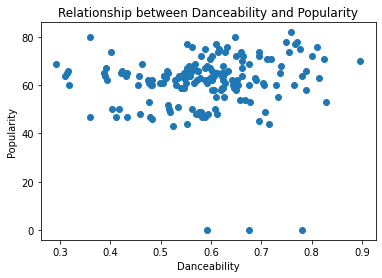

In [20]:
plt.scatter(df["danceability"], df["popularity"])
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Relationship between Danceability and Popularity");

In [21]:
df["danceability"].corr(df["popularity"])

0.07262172735707026

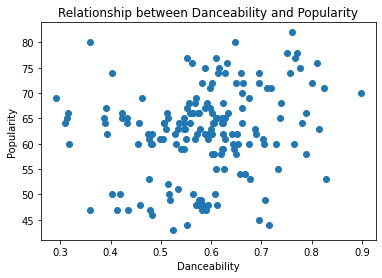

In [23]:
plt.scatter(df[mask]["danceability"], df[mask]["popularity"])
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Relationship between Danceability and Popularity");

In [24]:
df[mask]["danceability"].corr(df[mask]["popularity"])

0.2065274775511306